# 核心：Python 3

# 零、研究主题
根据客舱等级、票价与性别这三个自变量研究泰坦尼克号海难事故的生还率这个因变量。

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)



# 一、基本情况

In [49]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 1.剔除掉肯定与结论无关的列，分别是 ID、名字、票号

In [50]:
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis = 1)

In [51]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [52]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### 2.看一下总体生还人数与生还率

In [53]:
total_survived = titanic_df['Survived'].sum()
total_died = 891 - total_survived
print (total_survived,total_died)
print (total_survived / 891, total_died / 891)

342 549
0.3838383838383838 0.6161616161616161


### 3.总体生还率可视化

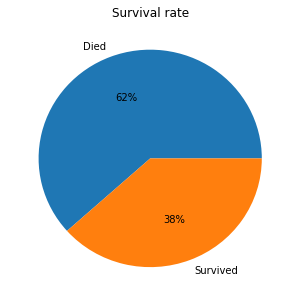

In [54]:
plt.figure(figsize = (5,5)) 
plt.subplot(111)
plt.pie([total_died, total_survived],labels=['Died','Survived'],autopct='%1.0f%%')
plt.title('Survival rate')

plt.show()

### 4.图片分析
图上蓝色部分代表遇难率，橘黄色部分代表生还率，显然，遇难率大于生还率

# 二、分析客舱级别与生还率的关系

### 1.各级客舱级别的人数

In [55]:
titanic_df[['Pclass','Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


### 2.各级级别客舱生还人数

In [56]:
survived_df = titanic_df[titanic_df[ 'Survived'] == 1 ]
survived_df[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


### 3.各级客舱生还率

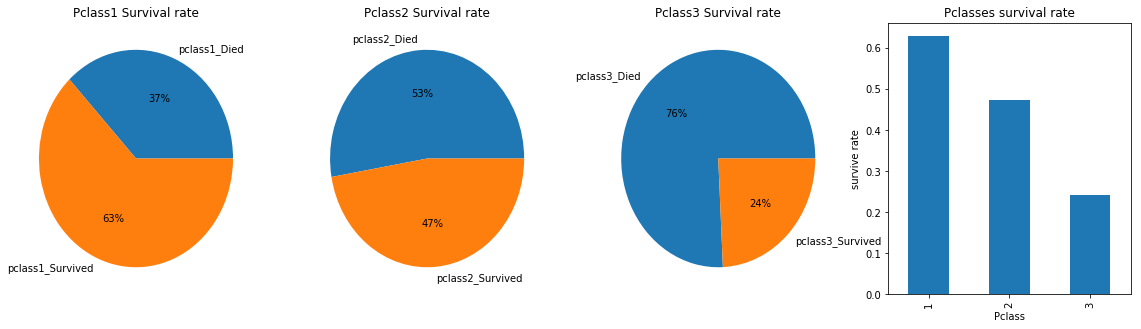

In [57]:
plt.figure(figsize=(20,5))

pclass1 = titanic_df[titanic_df['Pclass'] == 1]
plt.subplot(141)
plt.pie([pclass1['Survived'][pclass1['Survived'] == 0].count(),pclass1['Survived'][pclass1['Survived'] == 1].count()],
labels=['pclass1_Died', 'pclass1_Survived'],autopct='%1.0f%%')
plt.title('Pclass1 Survival rate') 

pclass2 = titanic_df[titanic_df['Pclass'] == 2]
plt.subplot(142)
plt.pie([pclass2['Survived'][pclass2['Survived'] == 0].count(),pclass2['Survived'][pclass2['Survived'] == 1].count()],
labels=['pclass2_Died', 'pclass2_Survived'],autopct='%1.0f%%')
plt.title('Pclass2 Survival rate') 

pclass3 = titanic_df[titanic_df['Pclass'] == 3]
plt.subplot(143)
plt.pie([pclass3['Survived'][pclass3['Survived'] == 0].count(),pclass3['Survived'][pclass3['Survived'] == 1].count()],
labels=['pclass3_Died', 'pclass3_Survived'],autopct='%1.0f%%')
plt.title('Pclass3 Survival rate') 

plt.subplot(144)
survived_by_pclass = titanic_df.groupby('Pclass')['Survived'].mean()
survived_by_pclass.plot(kind = 'bar')
plt.title('Pclasses survival rate') 
plt.ylabel('survive rate')

plt.show()

### 4.图片分析
图上三张饼图，蓝色部分代表遇难率，橘黄色部分代表生还率，从左到右分别是 pclass1/pclass2/pclass3，显然，从生还率来看，pclass1 > pclass2 > pclass3；
以上最右边一张图是三个等级客舱乘客生还率的对比，从左到右分别是 pclass1/pclass2/pclass3，很直观。

### 5.结论一：很明显，乘坐越高级客舱的人，生还率越高。客舱级别与生还率具有相关性。



# 三、分析票价与生还率的关系

### 1.票价的总体分布

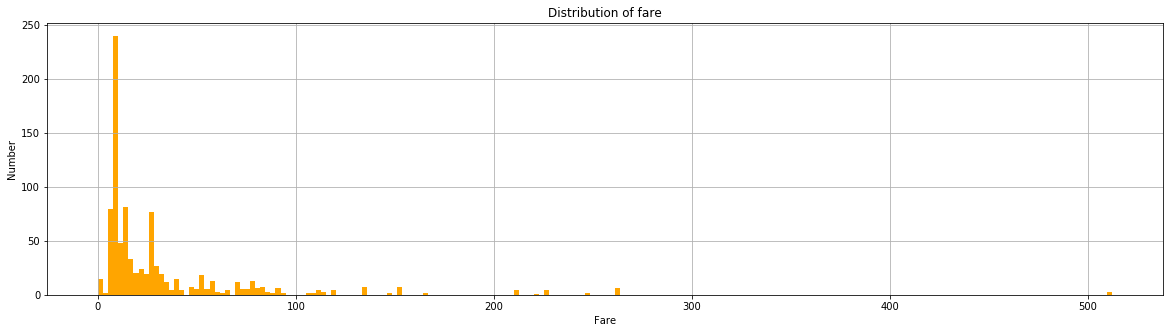

In [58]:
plt.figure(figsize=(20,5))
titanic_df['Fare'].hist(bins = 200,facecolor='orange')
plt.title('Distribution of fare') 
plt.xlabel('Fare')
plt.ylabel('Number')
plt.show()

### 2.图片分析
图上是样本全体乘客的票价分布。显然，大部分集中在 0~25 的区间。很直观。

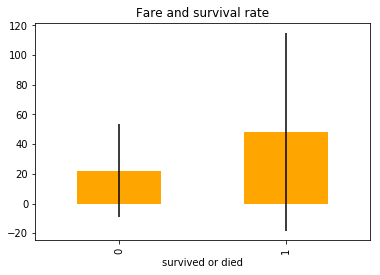

In [59]:
fare_died = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived = titanic_df["Fare"][titanic_df["Survived"] == 1]

fare_std = pd.DataFrame([fare_died.std(), fare_survived.std()])
fare_mean = pd.DataFrame([fare_died.mean(), fare_survived.mean()])
fare_mean.plot(yerr = fare_std,kind='bar',facecolor='orange',legend=False)
plt.title('Fare and survival rate') 
plt.xlabel('survived or died')

plt.show()

### 3.图片分析
图上是遇难者与生还者的票价均值分布对比图分布。显然，虽然低票价者相对更多，但生还者更多地分布在高票价这一边。

### 4.结论二：可以看出，票价越高的人，生还率越高。票价与生还率具有相关性。

# 四、分析票价与生还率的关系

### 1.船上男女人数比例

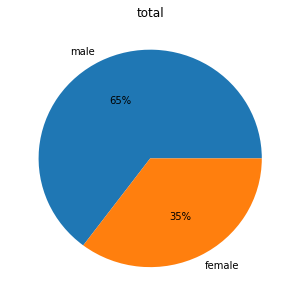

In [60]:
male_sum = titanic_df['Sex'][titanic_df['Sex'] == 'male'].count()
female_sum = titanic_df['Sex'][titanic_df['Sex'] == 'female'].count()

plt.figure(figsize=(5,5))
plt.subplot(111)
plt.pie([male_sum,female_sum],labels=['male', 'female'],autopct='%1.0f%%')
plt.title('total') 
plt.show()

### 2.图片分析
图上蓝色部分代表男性，橘黄色部分代表女性，显然，样本中男性多于女性

### 3.男性生还率

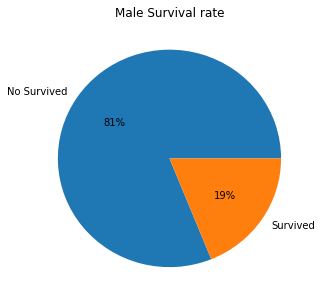

In [61]:
male_df = titanic_df[titanic_df['Sex'] == 'male']
male_df['Survived'][male_df['Survived'] == 1].count()
plt.figure(figsize=(5,5))

plt.subplot(111)
plt.pie([male_df['Survived'][male_df['Survived'] == 0].count(),male_df['Survived'][male_df['Survived'] == 1].count()],
        labels=['No Survived', 'Survived'],autopct='%1.0f%%')
plt.title('Male Survival rate') 
plt.show()

### 4.图片分析
图上蓝色部分代表男性遇难率，橘黄色部分代表男性生还率，显然，样本男性中遇难率大于生还率

### 5.女性生还率

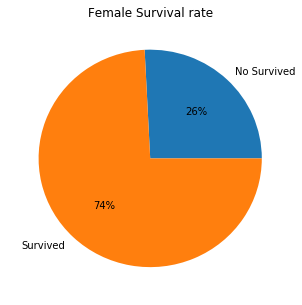

In [62]:
female_df = titanic_df[titanic_df['Sex'] == 'female']

plt.figure(figsize=(5,5))
plt.subplot(111)
plt.pie([female_df['Survived'][female_df['Survived'] == 0].count(),female_df['Survived'][female_df['Survived'] == 1].count()],
        labels=['No Survived', 'Survived'],autopct='%1.0f%%')
plt.title('Female Survival rate') 
plt.show()

### 6.图片分析
图上蓝色部分代表女性遇难率，橘黄色部分代表女性生还率，显然，样本女性中遇难率大于生还率

### 7.结论三：女性生还率比男性高，更易生还。性别与生还率具有相关性。

# 五、总结

### 1.总体情况
样本数量 891 人，生还者 342 人，死亡 549 人，生还率约 38%。

### 2.船舱类型
一等舱生还率约 63%，二等舱约 47%，三等舱为 24%。客舱等级越高，生还率越高。

### 3.票价
生还者的平均票价比遇难者高。原因可能是高收入（票价）者在灾难来临时更有理智，更能冷静地采取求生措施。

### 4.性别
男性 577 人，生还 109 人，生还率约 19%。女性 314 人，生还 233 人，生还率约 74%。女性生还率更高。



# 六、分析限制
### 1.样本数量
本数据样本为 891 人，只是泰坦尼克号上所有乘客的小部分，分析结果会与真实情况有出入
### 2.样本特征
样本里罗列的乘客特征可能不能完全勾勒出其全貌，也许会有其他能严重影响生还率的重要特征未被给出，比如乘客的身体素质、力量等。